In [1]:
from RNN.models import EncoderDecoderGRU
from utils import profile_predict

In [2]:
curve_dir = {}
curve_dir[1] = (
    "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/1/1_4_0_0.csv"
)
curve_dir[2] = (
    "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/2/2_4_0_0.csv"
)
curve_dir[3] = (
    "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/3/3_4_0_0.csv"
)
curve_dir[4] = (
    "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/4/4_4_0_0.csv"
)
curve_dir[5] = (
    "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/5/5_4_0_0.csv"
)
curve_dir[6] = (
    "/home/mazin/Projects/Thesis/Data/battery_model_paper/positive_discharge_20/149/6/6_4_0_0.csv"
)

pretrained_weights = "/home/mazin/Projects/Thesis/RNN/checkpoints/polar-sky-201/SEFD-monitor_val-epoch=629-train_loss=0.0000513-val_loss=0.0004591-val_mae=0.02010.ckpt"  # For comparison with Dynaformer for val and test comparison
encoder_input_length = 20
decoder_input_length = 1980
current_min = -2.5
current_max = 1
voltage_min = 2.5
voltage_max = 4.2

In [3]:
rnn_model = EncoderDecoderGRU.load_from_checkpoint(pretrained_weights).to("cpu")

/home/mazin/.pyenv/versions/3.9.18/envs/thesis_rnn/lib/python3.9/site-packages/torch/cuda/__init__.py:628: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/mazin/.pyenv/versions/3.9.18/envs/thesis_rnn/lib/python3.9/site-packages/torch/cuda/__init__.py:758: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() if nvml_count < 0 else nvml_count


In [10]:
profile = 2
actual_current, actual_voltage, predicted_voltage = profile_predict(
    rnn_model, curve_dir[profile]
)

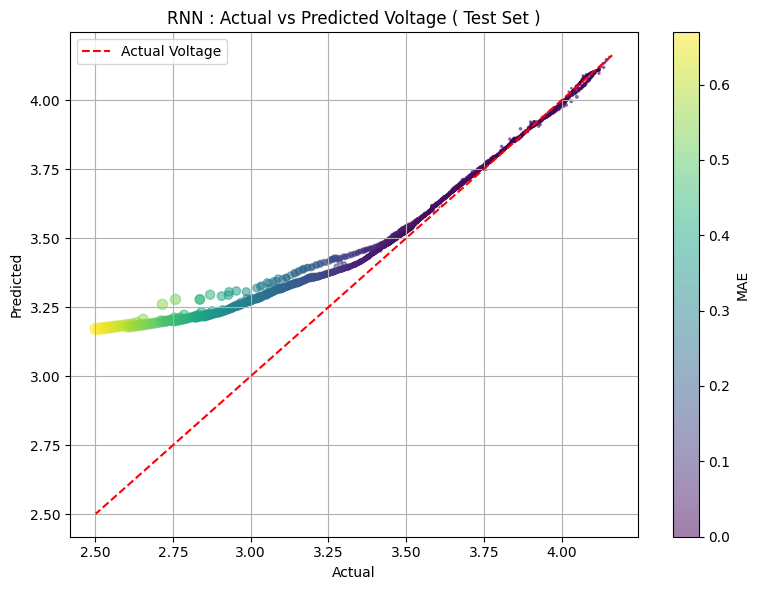

In [14]:
import numpy as np
import matplotlib.pyplot as plt


def plot_correlation_with_mae(actual, predicted):
    """
    Plot correlation between actual and predicted values with MAE visualization.

    Parameters:
        actual (array-like): Array of actual values.
        predicted (array-like): Array of predicted values.
    """
    # Convert input arrays to numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)

    # Calculate Mean Absolute Error (MAE)
    mae = np.abs(actual - predicted)

    # Create scatter plot
    plt.figure(figsize=(8, 6))

    # Plot scatter plot with marker size proportional to MAE
    plt.scatter(actual, predicted, c=mae, cmap="viridis", alpha=0.5, s=mae * 100)
    plt.plot(actual, actual, color="red", linestyle="--", label="Actual Voltage")

    # Add labels and title
    plt.title("RNN : Actual vs Predicted Voltage ( Test Set )")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")

    # Add colorbar for MAE
    cbar = plt.colorbar()
    cbar.set_label("MAE")

    # Show legend
    plt.legend()

    # Show plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_correlation_with_mae(actual_voltage, predicted_voltage)